<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***EXPLORATORY DATA ANALYSIS - EDA***

***TASK - From a given data set, find out - The most successful teams, players and factors***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [ ]:
# Team1 = Team batting first
# Team2 = Team batting second
df=pd.read_csv("matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.shape

(756, 18)

In [ ]:
df.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,2013.444444,3.366895,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


In [ ]:
# Number of seasons played
len(df['season'].unique())

12

In [ ]:
# Season with most number of matches
df['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

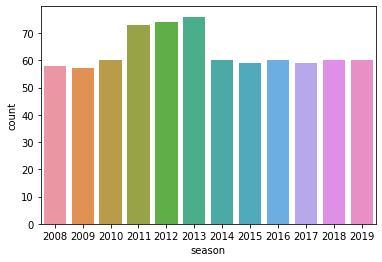

In [ ]:
#Season with most number of matches(VISUALIZATION)
sns.countplot(x='season', data=df)
plt.show()

In [ ]:
#Teams who lost the match by all the 10 Wickets
df[df['win_by_wickets']==10][['season','team1', 'team2','winner','win_by_wickets','player_of_match']]

,season,team1,team2,winner,win_by_wickets,player_of_match
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10,CA Lynn
34,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,10,Sandeep Sharma
71,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,10,AC Gilchrist
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,10,DL Vettori
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,JH Kallis
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10,SR Watson
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10,DR Smith
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,10,MEK Hussey
542,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,10,VR Aaron
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,10,B Kumar


       win_by_runs  win_by_wickets
count   756.000000      756.000000
mean     13.283069        3.350529
std      23.471144        3.387963
min       0.000000        0.000000
25%       0.000000        0.000000
50%       0.000000        4.000000
75%      19.000000        6.000000
max     146.000000       10.000000


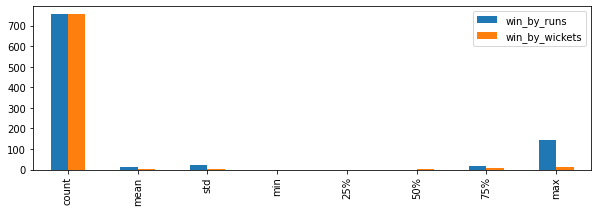

In [ ]:
#Analyzing winning scores
print(df[['win_by_runs', 'win_by_wickets']].describe())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 3)
df[['win_by_runs', 'win_by_wickets']].describe().plot(kind = 'bar')
plt.show()

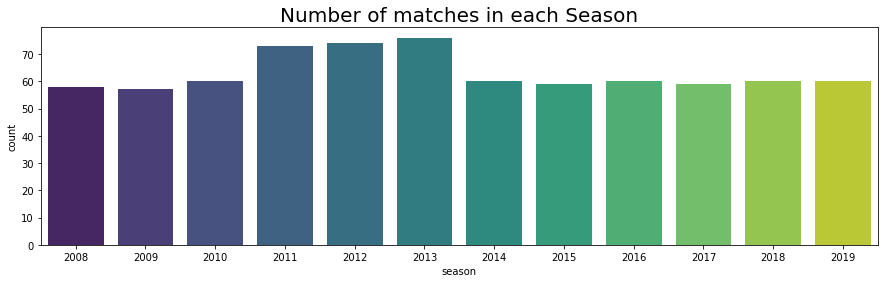

In [ ]:
#Number of matches in each season
plt.subplots(figsize=(15,4))
sns.countplot(x = df['season'].sort_values(), palette = 'viridis')
plt.title('Number of matches in each Season', fontsize = 20)
plt.show()

In [ ]:
df['winner']=df['winner'].fillna(df['winner'].value_counts().index[0])
df['player_of_match']=df['player_of_match'].fillna(df['player_of_match'].value_counts().index[0])

In [ ]:
#Most of the time cris gayle has been the player of the match
print(df['player_of_match'].value_counts().head())

CH Gayle          25
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64


In [ ]:
#Number of times teams have opted for batting first
print(df['team1'].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [ ]:
#Number of times teams have opted for batting second
print(df['team2'].value_counts())

Kolkata Knight Riders          95
Royal Challengers Bangalore    95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64


In [ ]:
print(df['winner'].value_counts())

Mumbai Indians                 113
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


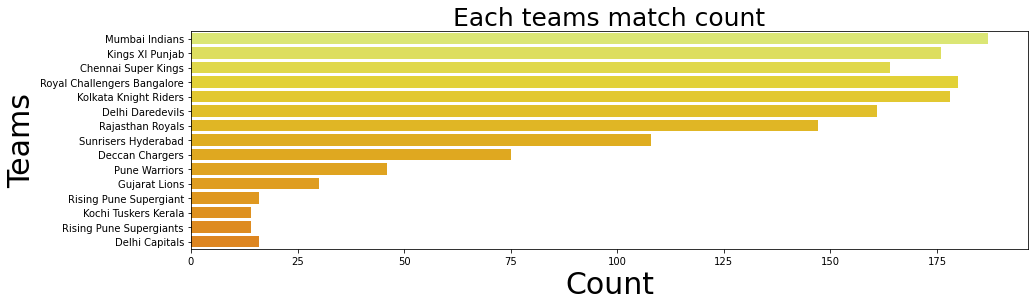

In [ ]:
#Match Count of each team
matches1=pd.DataFrame(df['team1'].value_counts())
matches2=pd.DataFrame(df['team2'].value_counts())
matches=pd.DataFrame(pd.concat([matches1, matches2], axis=1).sum(axis=1)).reset_index()
plt.subplots(figsize=(15,4))
sns.barplot(y=matches['index'], x=matches[0], palette = 'Wistia')
plt.title('Each teams match count', fontsize = 25)
plt.xlabel('Count', fontsize = 30)
plt.ylabel('Teams', fontsize = 30)
plt.show()

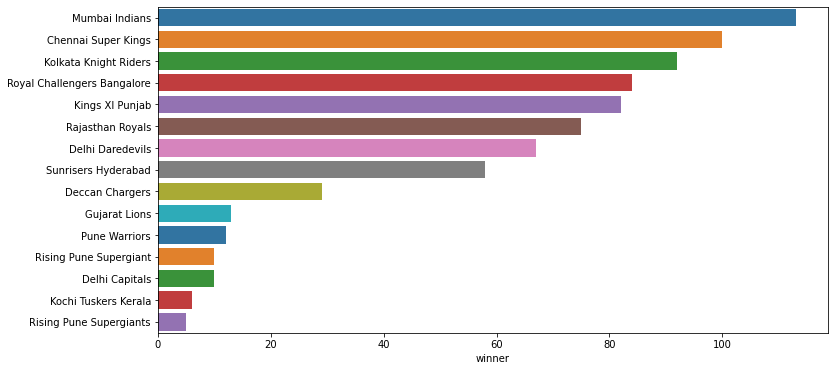

In [ ]:
#Most successfull team
plt.subplots(figsize=(12,6))
data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, palette="tab10");

In [ ]:
#The team that has won by maximum runs
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [ ]:
#The team that has won by maximum wickets
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [ ]:
#The team that has won by minimum runs
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [ ]:
#Sum of all the wickets a team has won by till now
df.groupby('winner')['win_by_wickets'].sum()

winner
Chennai Super Kings            289
Deccan Chargers                 72
Delhi Capitals                  29
Delhi Daredevils               275
Gujarat Lions                   65
Kings XI Punjab                268
Kochi Tuskers Kerala            30
Kolkata Knight Riders          351
Mumbai Indians                 307
Pune Warriors                   36
Rajasthan Royals               273
Rising Pune Supergiant          31
Rising Pune Supergiants         20
Royal Challengers Bangalore    314
Sunrisers Hyderabad            173
Name: win_by_wickets, dtype: int64

In [ ]:
df['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
#Number of toss winning teams that has won the matches
effect = df['toss_winner'] == df['winner']
effect.groupby(effect).size()

False    363
True     393
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


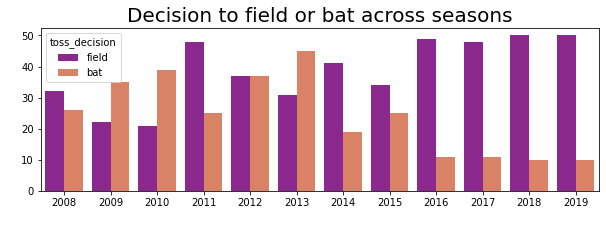

In [ ]:
#Comparing the Toss Decisions
sns.countplot(df['season'].sort_values(), hue = df['toss_decision'], palette = 'plasma')
plt.title("Decision to field or bat across seasons", fontsize = 20)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


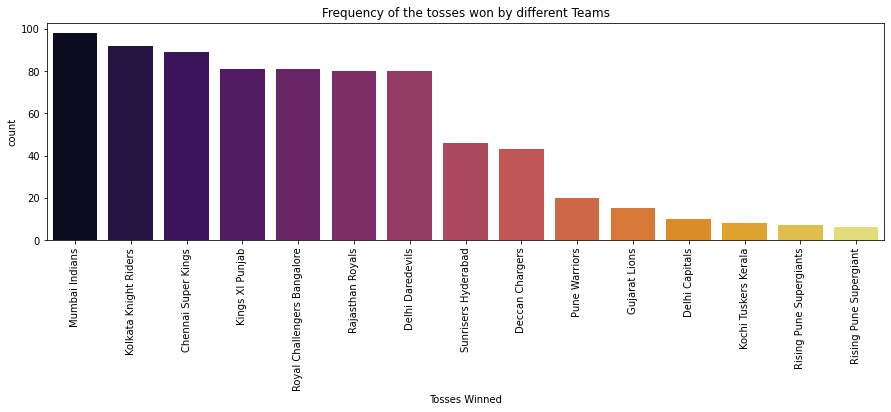

In [ ]:
#Frequency Of tosses won by different teams
plt.subplots(figsize=(15,4))
sns.countplot('toss_winner',data=df,palette='inferno',order=df['toss_winner'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Tosses Winned')
plt.title('Frequency of the tosses won by different Teams')
plt.show()

In [ ]:
#Most of the winning teams have taken the decision of fielding first 
Toss_decision_winner=df.groupby(['winner'],as_index=False)['toss_decision'].max()
Toss_decision_winner

,winner,toss_decision
0,Chennai Super Kings,field
1,Deccan Chargers,field
2,Delhi Capitals,field
3,Delhi Daredevils,field
4,Gujarat Lions,field
5,Kings XI Punjab,field
6,Kochi Tuskers Kerala,field
7,Kolkata Knight Riders,field
8,Mumbai Indians,field
9,Pune Warriors,field


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


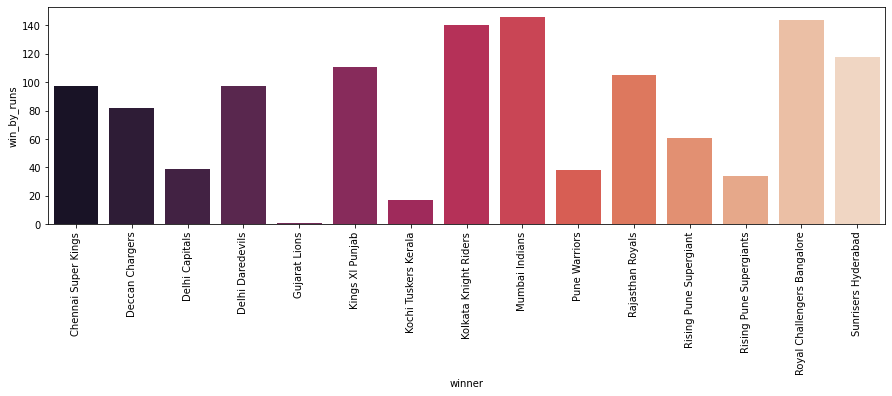

In [ ]:
#Maximum times Mumbai Indians have won by runs
win_max=df.groupby(['winner'],as_index=False)['win_by_runs'].max()
win_max
plt.subplots(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(win_max['winner'],win_max['win_by_runs'],palette="rocket")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


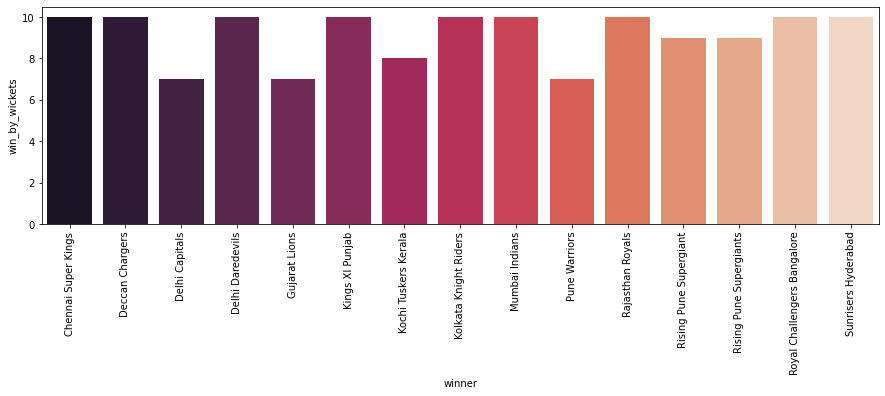

In [ ]:
#Maximum times Mumbai indians have won by wickets
wic_max=df.groupby(['winner'],as_index=False)['win_by_wickets'].max()
wic_max
plt.subplots(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(wic_max['winner'],wic_max['win_by_wickets'],palette="rocket")

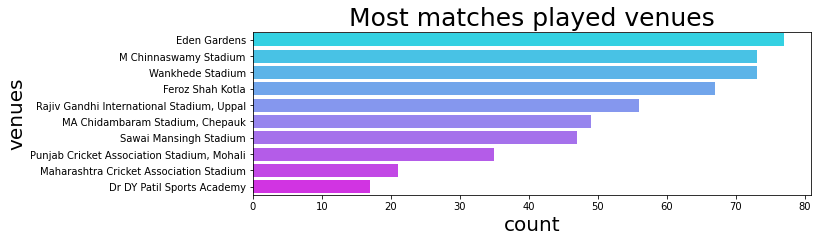

In [ ]:
#Most matches played venues
sns.barplot(y=df['venue'].value_counts().head(10).index, x=df['venue'].value_counts().head(10).values, palette = 'cool')
plt.title('Most matches played venues', fontsize=25)
plt.xlabel('count', fontsize=20)
plt.ylabel('venues',fontsize=20)
plt.show()

***CONCLUSION - 1. Teams or players a company should endorse for its products: CH Gayle and AB de Villiers.
2. Most successful teams: Mumbai Indians and Chennei Superkings.
3. Most successful players: CH Gayle and AB de Villiers.
4. Factors contributing win or loss of a team: Most of the winning teams have taken the decision of fielding first, more the number of tosses you win more is chances of winning the game, more the matches you play more is chances to suceed.***